In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [43]:
os.getcwd()

'f:\\MajorProject\\Data\\Test'

In [44]:
cd/MajorProject/Data/Train

f:\MajorProject\Data\Train


In [45]:
os.getcwd()

'f:\\MajorProject\\Data\\Train'

In [46]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [47]:
cd/MajorProject/Data/Test

f:\MajorProject\Data\Test


In [48]:

test_file = os.getcwd()
test_data = []
test_labels = []
classes = 43
for i in os.listdir(test_file):
    print(i)
    img_path = test_file+'/'+i
    print(img_path)
    img = cv2.imread(img_path,-1)
    img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
    test_data.append(img)
    test_labels.append(i)

test_data = np.array(test_data)
test_labels = np.array(test_labels)


00000.png
f:\MajorProject\Data\Test/00000.png
00001.png
f:\MajorProject\Data\Test/00001.png
00002.png
f:\MajorProject\Data\Test/00002.png
00003.png
f:\MajorProject\Data\Test/00003.png
00004.png
f:\MajorProject\Data\Test/00004.png
00005.png
f:\MajorProject\Data\Test/00005.png
00006.png
f:\MajorProject\Data\Test/00006.png
00007.png
f:\MajorProject\Data\Test/00007.png
00008.png
f:\MajorProject\Data\Test/00008.png
00009.png
f:\MajorProject\Data\Test/00009.png
00010.png
f:\MajorProject\Data\Test/00010.png
00011.png
f:\MajorProject\Data\Test/00011.png
00012.png
f:\MajorProject\Data\Test/00012.png
00013.png
f:\MajorProject\Data\Test/00013.png
00014.png
f:\MajorProject\Data\Test/00014.png
00015.png
f:\MajorProject\Data\Test/00015.png
00016.png
f:\MajorProject\Data\Test/00016.png
00017.png
f:\MajorProject\Data\Test/00017.png
00018.png
f:\MajorProject\Data\Test/00018.png
00019.png
f:\MajorProject\Data\Test/00019.png
00020.png
f:\MajorProject\Data\Test/00020.png
00021.png
f:\MajorProject\Data\Tes

In [49]:
X_train, y_train = data, labels
X_test, y_test = test_data, test_labels

print("Image Shape: {}".format(X_train[0].shape))
print(y_train.shape)
print(y_test.shape)
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))

Image Shape: (30, 30, 3)
(39209,)
(12630,)
Training Set:   39209 samples
Test Set:       12630 samples


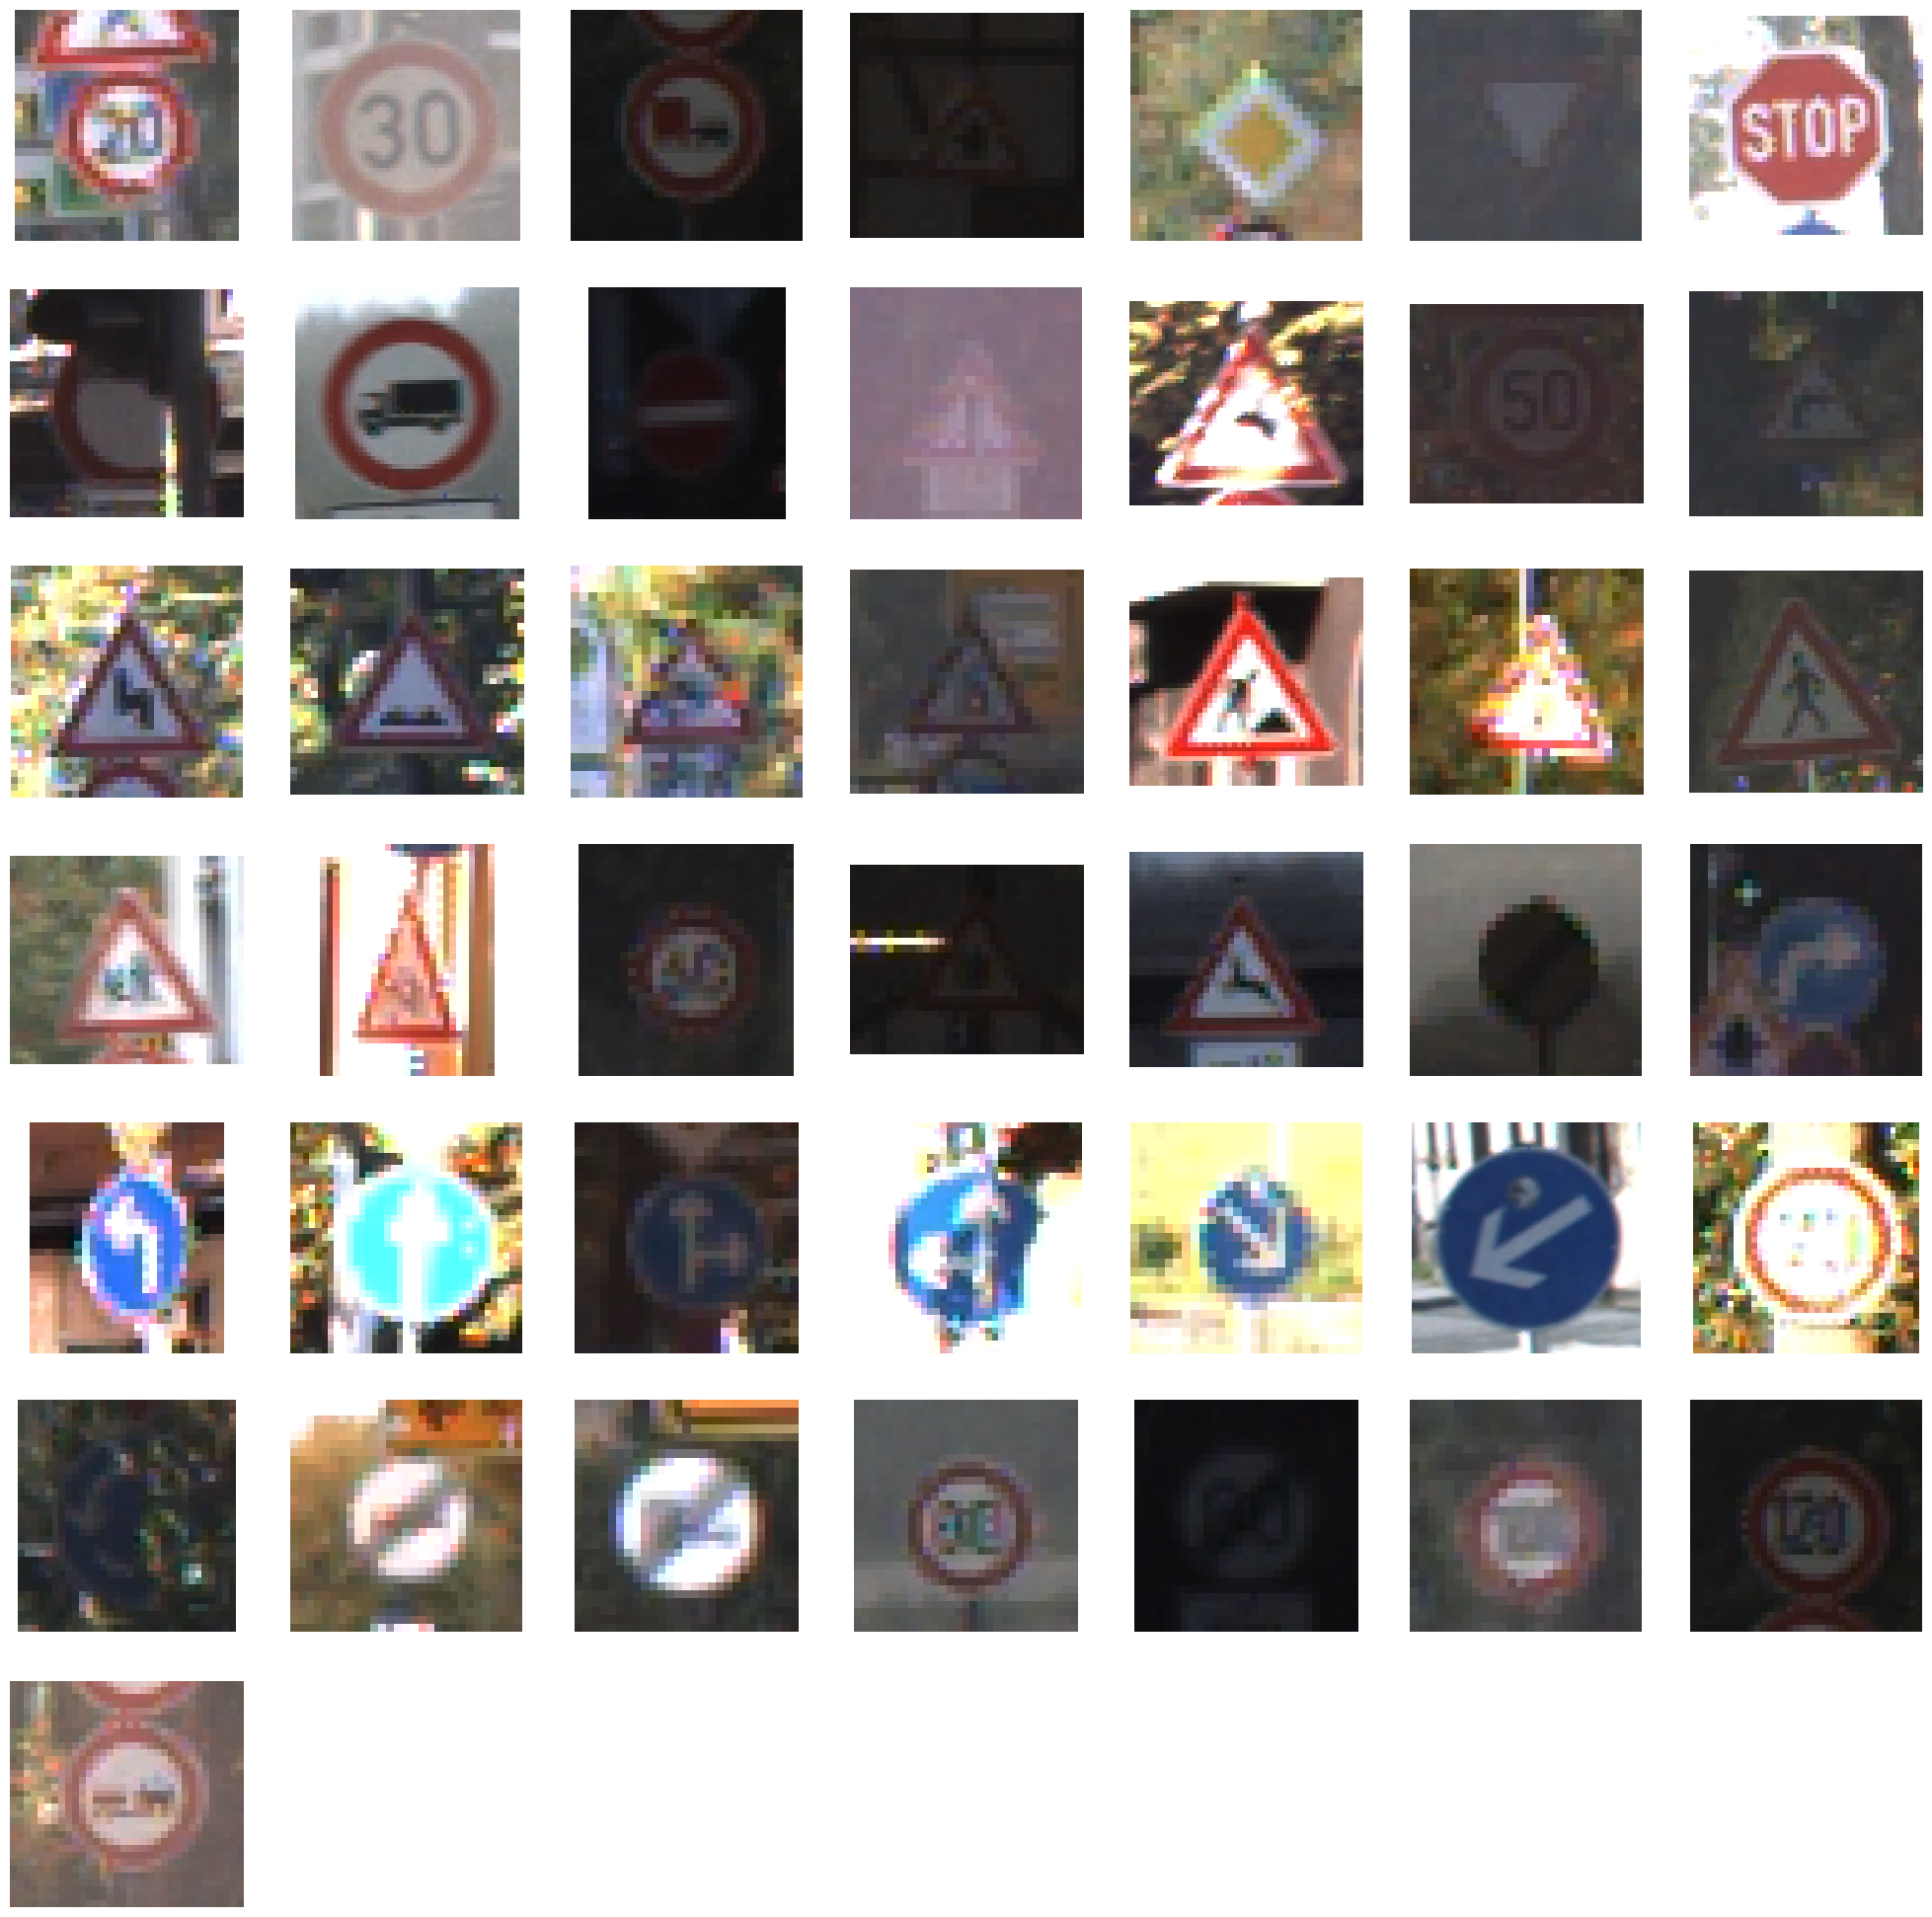

In [41]:
import random
from matplotlib.image import imread
cp= 'f:/MajorProject/Data/Train'
plt.figure(figsize=(25,25))

count=1
for i in os.listdir(cp):
    plt.subplot(7,7,count)
    dir = cur_path  + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        image = imread(img_path)
        plt.imshow(image)
        plt.grid('off')
        plt.axis('off')
        plt.xlabel(image.shape[0],fontsize=20)
        plt.ylabel(image.shape[0],fontsize=20)
        count+=1
        break


In [50]:
from numpy import newaxis

def gray_maker(data):
    gray_images = []
    for image in data:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)
    return np.array(gray_images)


def preprocess(data,data_name,verbose):
    if verbose:
        print('Preprocessing '+ data_name + '...')


    data = gray_maker(data)
    data = data[..., newaxis]

    data = data / 255 * 0.8 + 0.1

    if verbose:
        print('Finished preprocessing '+ data_name + '...')

 
    image_shape = data.shape

    if verbose:
        print('Processed '+ data_name + ' shape =', image_shape)
        print(" ")
    return data

In [51]:
X_train = preprocess(X_train,'train_data',verbose = True)

X_test = preprocess(X_test,'test_data',verbose = True)

Preprocessing train_data...
Finished preprocessing train_data...
Processed train_data shape = (39209, 30, 30, 1)
 
Preprocessing test_data...
Finished preprocessing test_data...
Processed test_data shape = (12630, 30, 30, 1)
 


<Figure size 100x100 with 0 Axes>

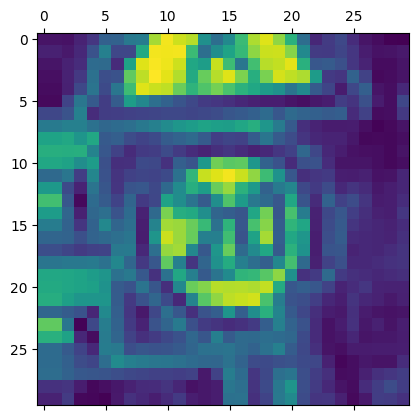

In [69]:
plt.figure(figsize=(1,1))
plt.matshow(X_train[0])

In [70]:
print(X_train.shape, labels.shape)

(39209, 30, 30, 1) (39209,)


In [71]:
print(X_train.shape, labels.shape)
#Splitting training and validation dataset

X_train, X_valid, y_train, y_valid = train_test_split(X_train, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(39209, 30, 30, 1) (39209,)
(31367, 30, 30, 1) (7842, 30, 30, 1) (31367,) (7842,)


In [72]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)

In [73]:
y_train.shape, y_valid.shape

((31367, 43), (7842, 43))

In [74]:
#CNN model
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [76]:
import visualkeras

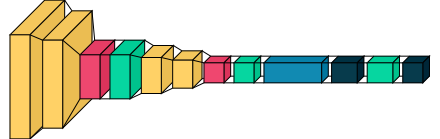

In [77]:
visualkeras.layered_view(model)

In [78]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train, batch_size=160, epochs=epochs, validation_data=(X_valid, y_valid))
model.save("f:/MajorProject/traffic_classifier.h5")

Epoch 1/20
197/197 [==============================] - 55s 263ms/step - loss: 2.7839 - accuracy: 0.2526 - val_loss: 0.9854 - val_accuracy: 0.7414
Epoch 2/20
197/197 [==============================] - 56s 284ms/step - loss: 0.8388 - accuracy: 0.7490 - val_loss: 0.3086 - val_accuracy: 0.9112
Epoch 3/20
197/197 [==============================] - 56s 286ms/step - loss: 0.4496 - accuracy: 0.8623 - val_loss: 0.1705 - val_accuracy: 0.9579
Epoch 4/20
197/197 [==============================] - 57s 288ms/step - loss: 0.3223 - accuracy: 0.8991 - val_loss: 0.1390 - val_accuracy: 0.9619
Epoch 5/20
197/197 [==============================] - 58s 293ms/step - loss: 0.2510 - accuracy: 0.9230 - val_loss: 0.0933 - val_accuracy: 0.9726
Epoch 6/20
197/197 [==============================] - 56s 285ms/step - loss: 0.2017 - accuracy: 0.9368 - val_loss: 0.0753 - val_accuracy: 0.9805
Epoch 7/20
197/197 [==============================] - 56s 284ms/step - loss: 0.1781 - accuracy: 0.9450 - val_loss: 0.0632 - val_ac

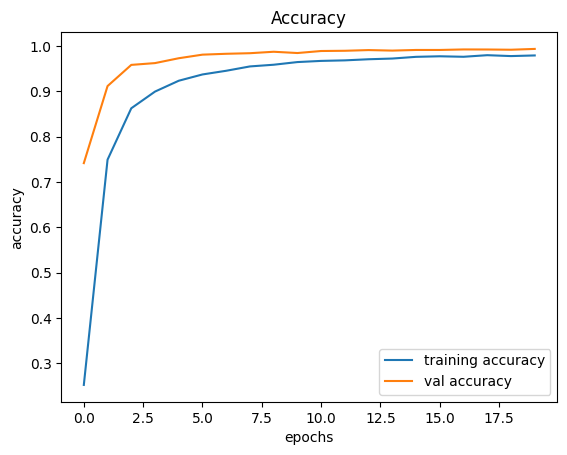

In [79]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

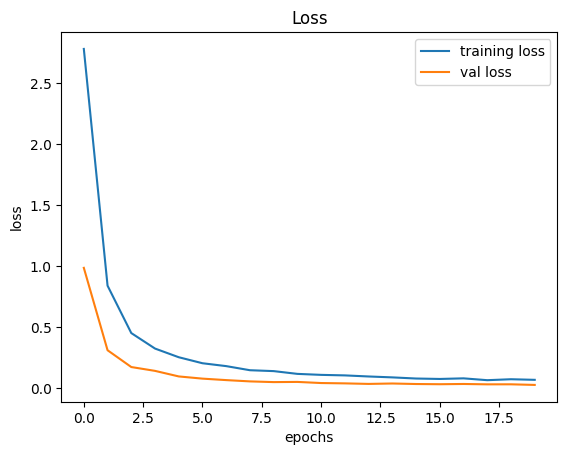

In [80]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [81]:
# Score
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.023606713861227036
Test accuracy 0.9931139945983887


In [82]:
y_pred = model.predict(X_valid)
y_valid_class = np.argmax(y_valid,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 3s 12ms/step


In [83]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_valid_class)
score

0.9931140015302219

In [84]:
model.save('../../traffic_classifier.h5')

In [85]:
y_pred = model.predict(X_valid)
y_valid_class = np.argmax(y_valid,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 3s 12ms/step


In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_valid_class,y_pred_class))
print(confusion_matrix(y_valid_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.99      0.99      0.99       496
           2       0.99      0.99      0.99       420
           3       0.98      1.00      0.99       294
           4       0.99      0.99      0.99       400
           5       0.99      0.98      0.98       364
           6       1.00      1.00      1.00        69
           7       0.98      1.00      0.99       313
           8       1.00      0.99      0.99       274
           9       1.00      1.00      1.00       277
          10       1.00      1.00      1.00       398
          11       1.00      0.99      1.00       261
          12       1.00      1.00      1.00       443
          13       1.00      1.00      1.00       422
          14       1.00      0.98      0.99       135
          15       0.99      1.00      1.00       118
          16       1.00      1.00      1.00        86
          17       1.00    

Text(283.22222222222223, 0.5, 'Truth')

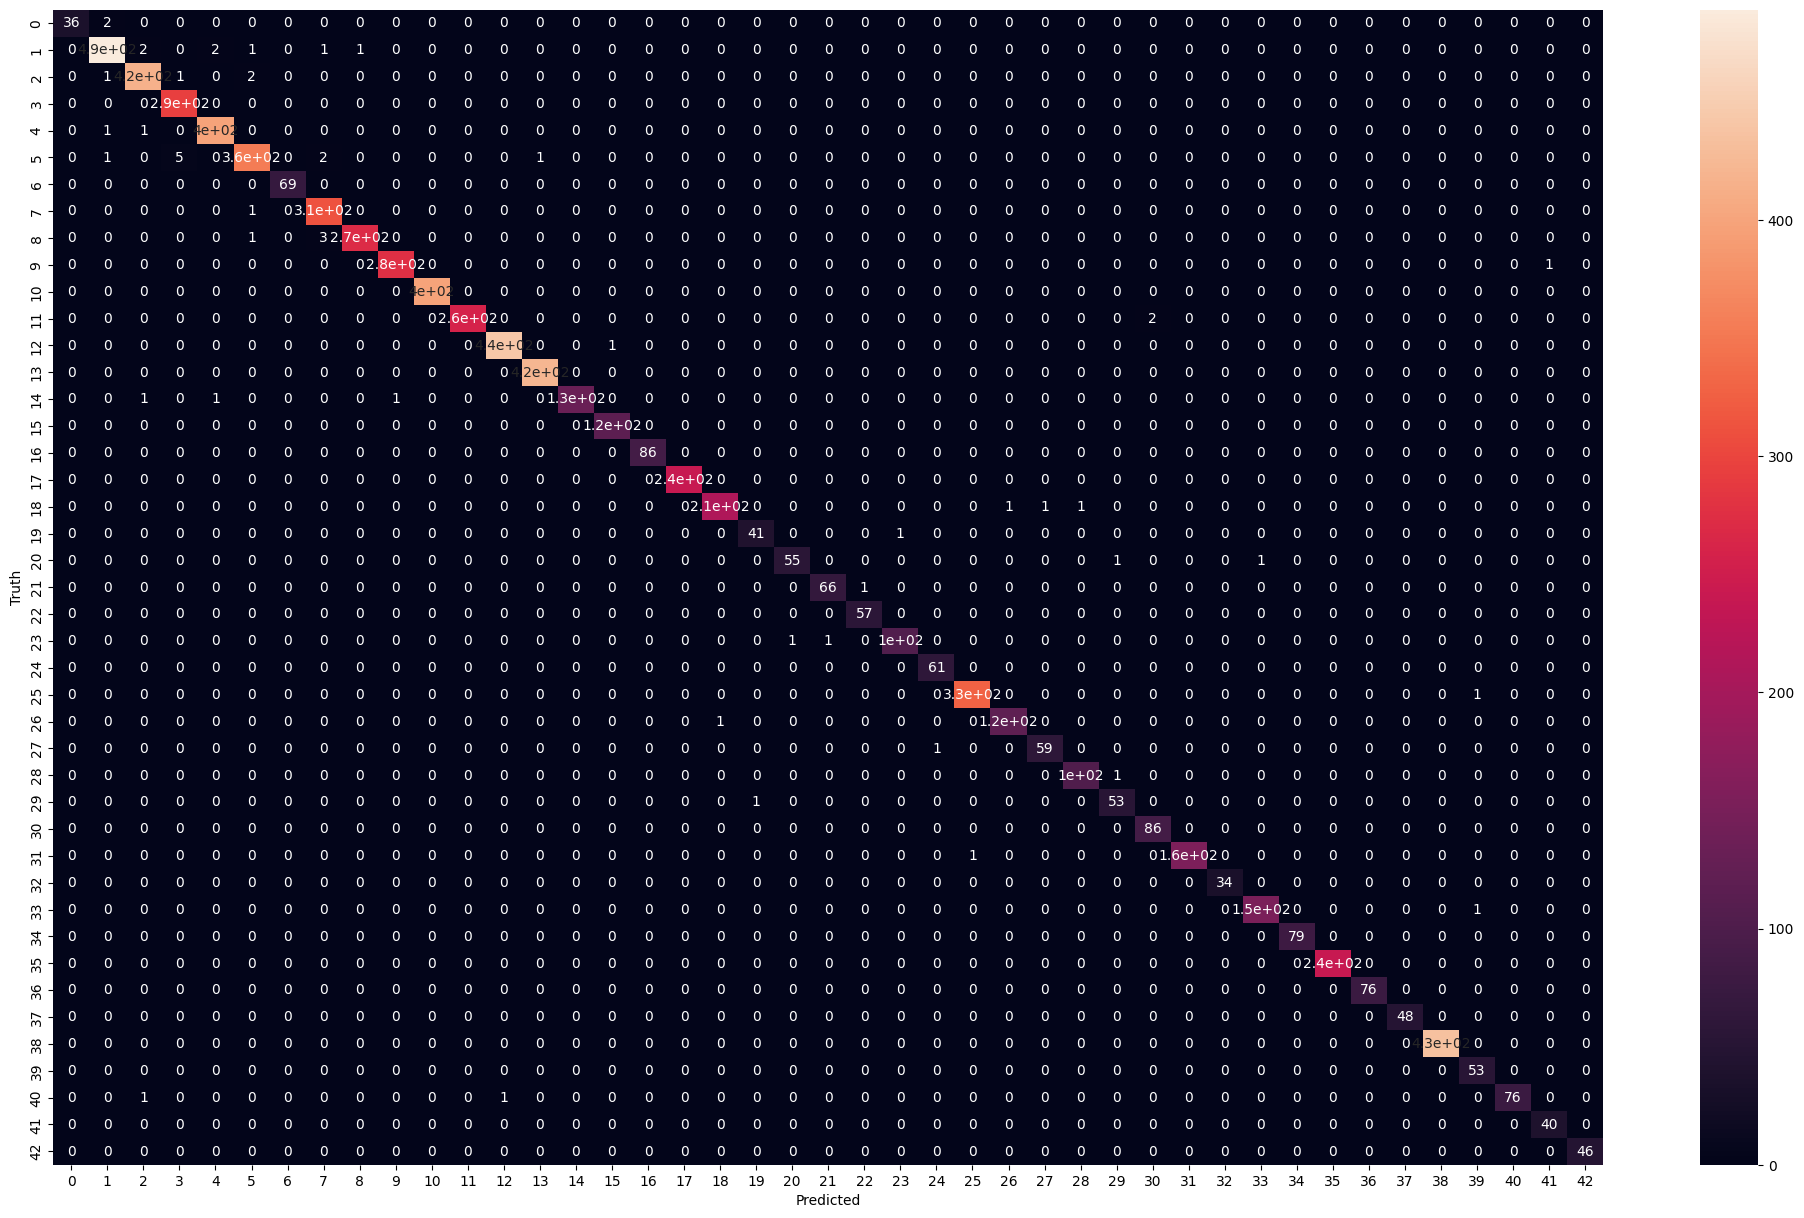

In [89]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid_class, y_pred_class)
import seaborn as sns
plt.figure(figsize = (25,15))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import cv2
import numpy as np
from numpy import newaxis
import pyttsx3
import os
#load the trained model to classify sign
from keras.models import load_model
model = load_model('f:/MajorProject/traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def gray_maker(data):
    gray_images = []
    for image in data:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)
    return np.array(gray_images)


def preprocess(data):
    
    # Iterate through grayscale
    data = gray_maker(data)
    data = data[..., newaxis]

    data = data / 255 * 0.8 + 0.1

    
    image_shape = data.shape

    return data

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)

    # preprocess image
    image = preprocess(image)
    yp = model.predict(image)
    pred= np.argmax(yp[0])
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
    engine=pyttsx3.init()
    engine.say(sign)
    engine.runAndWait()

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def realtime():
    signs_pred=[]
    i=0
    try:
        cap = cv2.VideoCapture(0)
        i = 0
        while(cap.isOpened()):
            ret, frame = cap.read()
            if i > 25:
                break
         

            file_path='f:/MajorProject/Data/VideoCapture/Frame'+str(i)+'.jpg'
            cv2.imwrite(file_path, frame)
            uploaded=Image.open(file_path)
            uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
            im=ImageTk.PhotoImage(uploaded)

            sign_image.configure(image=im)
            sign_image.image=im
            label.configure(text='')

            global label_packed
            
            image = cv2.imread(file_path,-1)
            image = cv2.resize(image, (30,30), interpolation = cv2.INTER_NEAREST)
            
            image = np.expand_dims(image, axis=0)
            image = np.array(image)

            # preprocess image
            image = preprocess(image)

            yp = model.predict(image)
            pred= np.argmax(yp[0])
            sign = classes[pred]
            print(sign)

            signs_pred.append(pred)
            
            i += 1

        signs_pred = np.array(signs_pred)
        print(signs_pred)
    
        sign = np.bincount(signs_pred).argmax()
        sign = classes[sign]
        print(sign)
        label.configure(foreground='#011638', text=sign)

        engine=pyttsx3.init()
        engine.say(sign)
        engine.runAndWait()
        
        print('{}'.format(i))    
        cap.release()
        cv2.destroyAllWindows()

    except:
        pass

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=30,pady=10)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)

realt=Button(top,text="Real time capture",command=realtime,padx=30,pady=10)
realt.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
realt.pack(side=BOTTOM,pady=50)

sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Traffic Sign Classifier",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 364ms/step
Wild animals crossing
1/1 [==============================] - 0s 21ms/step
General caution
1/1 [==============================] - 0s 23ms/step
No entry
1/1 [==============================] - 0s 22ms/step
No entry
1/1 [==============================] - 0s 24ms/step
No entry
1/1 [==============================] - 0s 28ms/step
No entry
1/1 [==============================] - 0s 25ms/step
Go straight or left
1/1 [==============================] - 0s 25ms/step
Keep right
1/1 [==============================] - 0s 28ms/step
Keep right
1/1 [==============================] - 0s 27ms/step
Beware of ice/snow
1/1 [==============================] - 0s 21ms/step
Turn left ahead
1/1 [==============================] - 0s 25ms/step
Keep right
1/1 [==============================] - 0s 29ms/step
Priority road
1/1 [==============================] - 0s 22ms/step
Priority road
1/1 [==============================] - 0s 23ms/step
Roundabout mandatory
1/1 [===